<a href="https://colab.research.google.com/github/pranshu1310/MLnow_2.0/blob/main/Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Linear Regression

---



[Link to Download the Dataset](https://www.kaggle.com/mirichoi0218/insurance)

**Author:** Pranshu Dhingra

In [1]:
#importing libraries for data processing
import os
import pandas as pd
import numpy as np

import missingno as msno
import random
import math
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

# importing sklearn libraries for data pre-processing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split



# importing librraies for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd '/content/drive/MyDrive/GS_Assignments'

/content/drive/MyDrive/GS_Assignments


In [5]:
ls

EDA/  insurance.csv


In [6]:
mathData=pd.read_csv('insurance.csv')
mathData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Processing

In [7]:
mathData.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Points to be noted:


*   No null values present.
*   The data needs to be scaled before before we train it as the mean and the standard deviation belong to diverse ranges.


In [9]:
#unique classes/categories in every column 

#print(f'age: {mathData.age.unique()}')
print(f'sex: {mathData.sex.unique()}')
#print(f'bmi: {mathData.bmi.unique()}')
print(f'children: {mathData.children.unique()}')
print(f'smoker: {mathData.smoker.unique()}')
print(f'region: {mathData.region.unique()}')
#print(f'charges: {mathData.charges.unique()}')

sex: ['female' 'male']
children: [0 1 3 2 5 4]
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


In [10]:
mathData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Checking and removing duplicate rows, if any:

In [11]:
dup_rows=len(mathData)-len(mathData.drop_duplicates(keep="first"))
if dup_rows!= 0:
    print("Number of duplicate rows found : {}\n\nDuplicates removed!".format(dup_rows))
    mathData.drop_duplicates(keep="first",inplace=True)
else:
    print("No duplicate entries found!")

Number of duplicate rows found : 1

Duplicates removed!


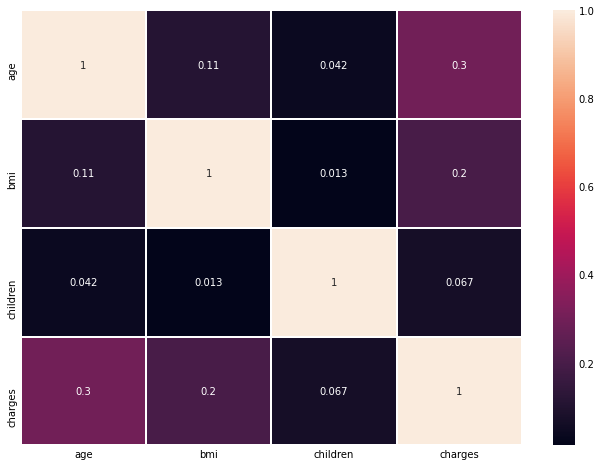

In [12]:
plt.figure(figsize = (10, 8))

sns.heatmap(mathData.corr(), annot = True, linewidths = 1)
plt.show()

### Visualizing the features:

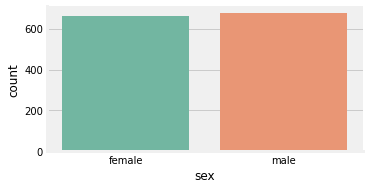

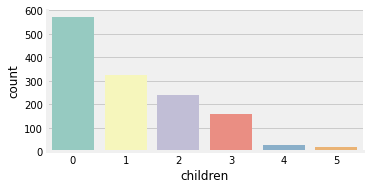

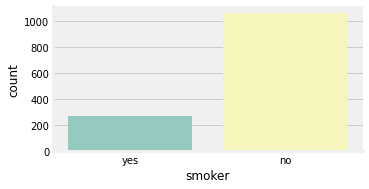

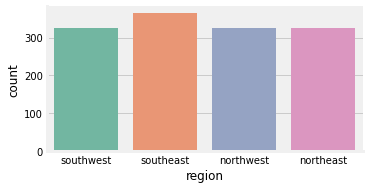

In [13]:
for v in ['sex', 'children', 'smoker', 'region']:
    
    fig = sns.catplot(x=v,data=mathData,kind="count",palette="Set"+str(random.randint(1,3)),height=2.5,aspect=2)

Here, we observe that:
*   There are an almost equal number of males and female patients.
*   Most of the children are not covered by health insurance.
*   The number of non-smokers are higher than the number of smokers.
*   The patients are almost evenly distributed among all regions.





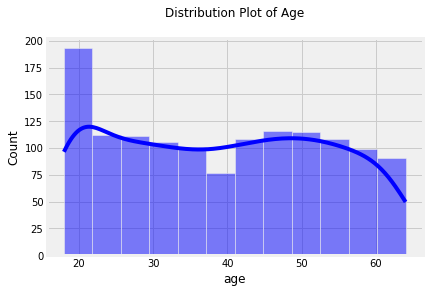

In [14]:
sns.histplot(mathData['age'],color='blue',kde=True)
plt.title('Distribution Plot of Age\n', fontsize =  12)
plt.show()

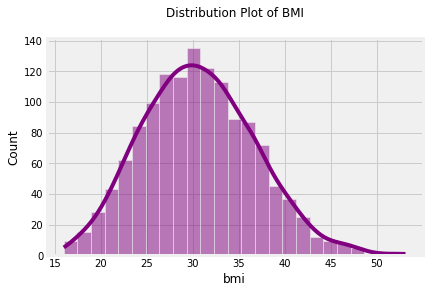

In [15]:
sns.histplot(mathData['bmi'],color='purple',kde=True)
plt.title('Distribution Plot of BMI\n', fontsize =  12)
plt.show()

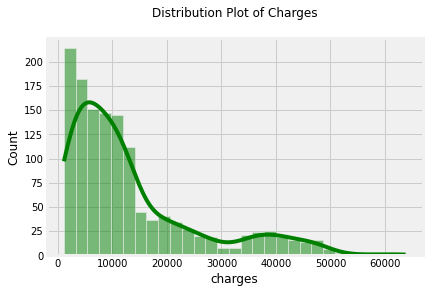

In [16]:
#plt.figure(figsize = (10, 7))
sns.histplot(mathData['charges'],color='green',kde=True)
plt.title('Distribution Plot of Charges\n', fontsize =  12)
plt.show()

Observations:
*   The highest number of patients are aged 20.
*   BMI is normally distributed
*   Charges are positively skewed. This means that most of the observations lie to the right of the graph's peak. There are more number of cases that are charged less and less number of cases charged high.






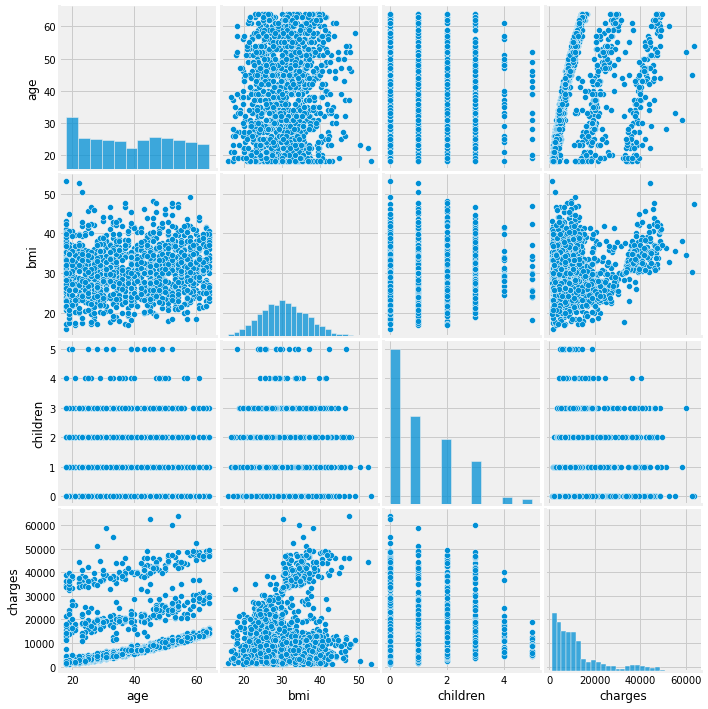

In [17]:
sns.pairplot(mathData)

In [18]:
age_18_25 = mathData.age[(mathData.age >= 18) & (mathData.age <= 25)]
age_26_35 = mathData.age[(mathData.age >= 26) & (mathData.age <= 35)]
age_36_45 = mathData.age[(mathData.age >= 36) & (mathData.age <= 45)]
age_46_55 = mathData.age[(mathData.age >= 46) & (mathData.age <= 55)]
age_55above = mathData.age[mathData.age >= 55]

In [19]:

x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

px.bar(data_frame = mathData, x = x_age, y = y_age, color = x_age, 
       title = 'Number of patients per age group',width=800,height=500)


In [20]:
px.scatter(data_frame = mathData, x = 'age', y = 'charges', color = 'age',width=800,height=500)

The relationship between age and charges seems to be based on a third factor that needs to be explored.

In [21]:
px.scatter(data_frame = mathData, x = 'age', y = 'charges', color = 'smoker',width=800,height=500)

From here we can see that non-smokers are charged less as compared to the smokers of the same age.

In [22]:
px.histogram(data_frame = mathData, x = 'charges', nbins = 100, color = 'sex', marginal = 'box', width=800,height=500)

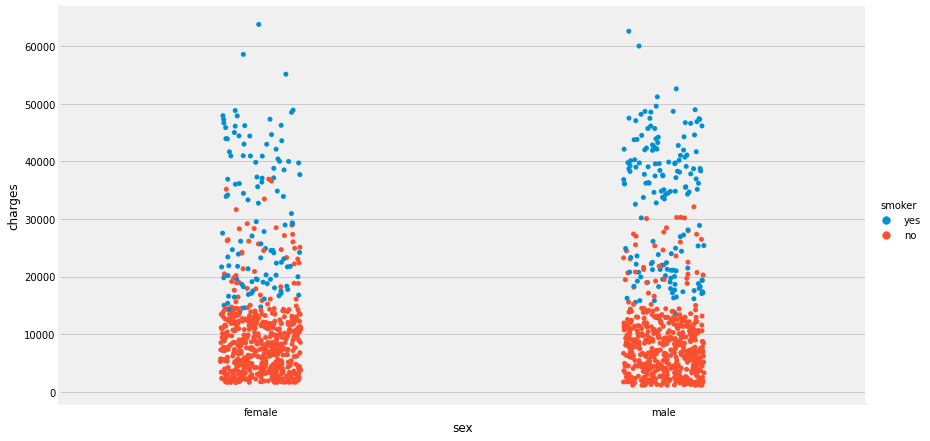

In [23]:
sns.catplot(x = 'sex', y = 'charges', hue = 'smoker', data = mathData, height = 6, aspect = 2)
plt.show()

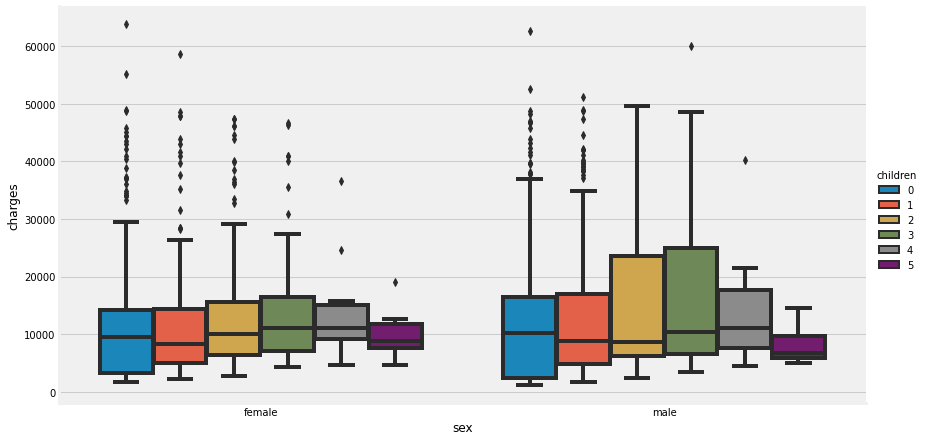

In [24]:
sns.catplot(x = 'sex', y = 'charges', hue = 'children', data = mathData, kind = 'box',height = 6, aspect = 2)
plt.show()

In [25]:
px.scatter(data_frame = mathData, x = 'bmi', y = 'charges', color = 'sex',width=800,height=500)

In [26]:
px.scatter(data_frame = mathData, x = 'bmi', y = 'charges', color = 'smoker',width=800,height=500)

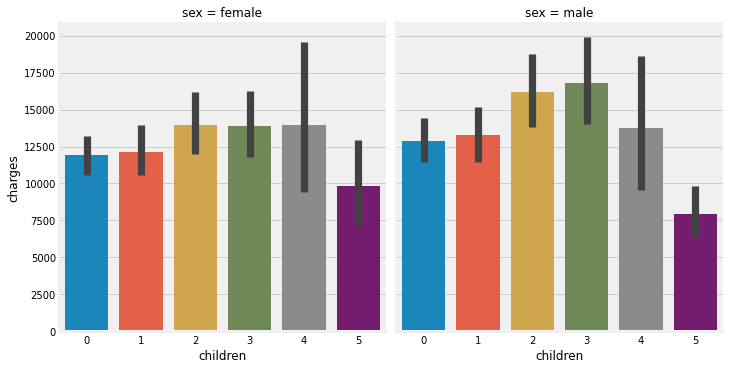

In [27]:
sns.catplot(x = 'children', y = 'charges', col = 'sex', data = mathData, kind = 'bar')
plt.show()

In [28]:
px.box(x = 'children', y = 'charges', color = 'region', data_frame = mathData, width=800, height=500)

In [29]:
px.box(data_frame = mathData, x = 'smoker', y = 'charges', color = 'region', height=500, width=800)

Patients which are smoker pay high charges.
Highest smoker patients are from southeast region

In [30]:
px.box(data_frame = mathData, x = 'region', y = 'charges', color = 'region', width=800, height=500)

Highest number of patients are from southeast region.
Patients from northwest and southwest region pays higher charges.

##Data Pre-Processing

In [31]:
# As figured out above, we will normalize our data in this step

ct = make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']), (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region']))

In [32]:
X = mathData.drop('charges', axis = 1)
y = mathData['charges']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [34]:
# fitting column transformer on training data
ct.fit(X_train)

# transforming training and test data with normalizing (MinMaxScaler) and one hot encodig (OneHotEncoder)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

## Model Building

In [35]:
numFeatures = len(X.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)
print(inputNeurons)

4


In [36]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2*inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(1)
])

In [37]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.004),
    loss = 'mean_absolute_error',
    metrics = ['mae', 'mse']
)

In [38]:
numEpochs = 1000
history = model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), epochs = numEpochs)

Epoch 1/1000
34/34 [==============================] - 1s 6ms/step - loss: 13374.8447 - mae: 13374.8447 - mse: 326888256.0000 - val_loss: 12883.2393 - val_mae: 12883.2393 - val_mse: 306566144.0000
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 13368.2734 - mae: 13368.2734 - mse: 326714368.0000 - val_loss: 12873.2607 - val_mae: 12873.2607 - val_mse: 306310048.0000
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 13352.4287 - mae: 13352.4287 - mse: 326288320.0000 - val_loss: 12848.4082 - val_mae: 12848.4082 - val_mse: 305670592.0000
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 13313.2197 - mae: 13313.2197 - mse: 325233152.0000 - val_loss: 12789.7383 - val_mae: 12789.7383 - val_mse: 304149664.0000
Epoch 5/1000
34/34 [==============================] - 0s 3ms/step - loss: 13230.9014 - mae: 13230.9014 - mse: 323063488.0000 - val_loss: 12678.3447 - val_mae: 12678.3447 - val_mse: 301274176.0000
Epoch 6/1000
34/34 [

## Evaluating the Model

In [39]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3309.0051 - mae: 3309.0051 - mse: 51801672.0000


[3309.005126953125, 3309.005126953125, 51801672.0]

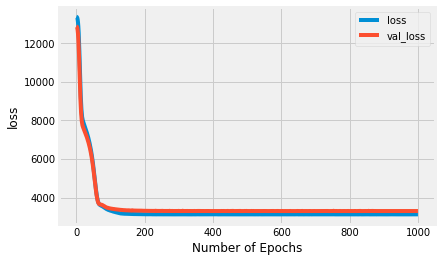

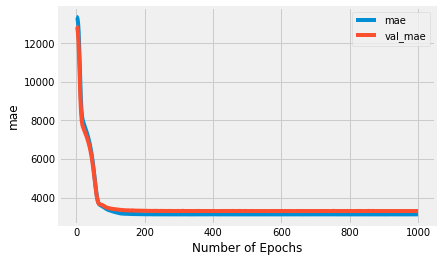

In [40]:
#Plot Functions

def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Number of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

pltGr(history, 'loss')
pltGr(history, 'mae')

In [41]:
testPreds = model.predict(X_test).flatten()
print(testPreds)

[ 4397.768    5858.059   10168.396    2201.2888  10971.351    8756.469
 30192.986    8713.601   13891.857    6793.2544  30021.662    3740.7498
 14417.107    8968.664    1608.0208  11465.433    1608.1907   1502.7915
  5710.9604   2233.7964  11752.77    15208.701   35836.22     5888.2573
 37376.24     4490.1777   2889.3972   1608.5713  12679.394   10200.169
  1608.7109  11395.07     8867.002   44499.844    6141.5396  12194.344
  6483.5522   7572.824    7337.618   11471.355    2523.253    9916.107
  8424.545    5247.695    1937.1265   7532.5      8895.       6876.124
  5948.889   32865.496   46477.       4737.934    6496.805    3925.2458
 33488.97     5238.3735   3369.8047   4649.8022  12466.406    5910.7485
  2573.16    10293.516    4170.566    4397.489    8538.164    4290.7603
  6430.466   44218.457   13094.044   11739.645    8629.72     8360.6
  1502.2135   2089.756    1503.1034  34533.54    11701.389   30494.457
  9507.221    6150.272    2793.6892   4354.9253   2250.8809  39896.434
  

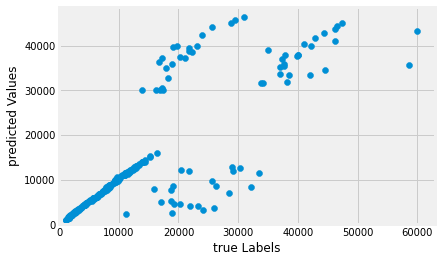

In [42]:
def predPlot(labels,preds):
  plt.scatter(labels, preds)
  plt.xlabel('true Labels')
  plt.ylabel('predicted Values')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(y_test, testPreds)

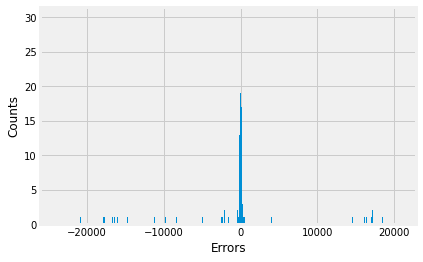

In [43]:
def errorPlot(preds, labels, counts):
  errors = testPreds - y_test
  plt.hist(errors, counts)
  plt.ylabel('Counts')
  plt.xlabel('Errors')
  plt.show()

errorPlot(testPreds, y_test, numEpochs)